## Importing packages

In [282]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import requests_cache

from matplotlib.ticker import FuncFormatter
from scipy.optimize import minimize
from pylab import plt
plt.style.use('seaborn')

session = requests_cache.CachedSession()

C:\Users\chrfur\AppData\Local\Temp\ipykernel_22564\357089485.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Load Data Portfolio Data

In [283]:
tickers = [
    "BA",
    "DAL",
    "ETHEREUM-XBT.ST",
    "QDVE.DE",
    "EXV9.DE",
    "DRUP.DE",
    "META",
    "SEZI.ST",
    "W1TA.DE",
    "DX2D.DE",
    "IQQH.DE"
]

In [284]:
raw = {}
for ticker in tickers:
    prices = yf.download(ticker, period = "max")
    prices_df = pd.DataFrame.from_dict(prices)
    raw[ticker] = prices_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [285]:
data = pd.DataFrame()
for ticker in raw:
    data[ticker] = raw[ticker]["Adj Close"]

data.dropna(inplace = True)
data.index = pd.DatetimeIndex(data.index)
data = data.loc["2018-01-01":]
data.tail()

,BA,DAL,ETHEREUM-XBT.ST,QDVE.DE,EXV9.DE,DRUP.DE,META,SEZI.ST,W1TA.DE,DX2D.DE,IQQH.DE
Date,,,,,,,,,,,
2022-11-18,173.889999,34.470001,114.830002,16.044001,18.469999,10.714,112.050003,12.00,37.660000,84.120003,11.298
2022-11-21,172.940002,34.230000,105.480003,16.052000,18.384001,10.710,109.860001,12.28,37.395000,84.400002,11.292
2022-11-22,172.500000,34.230000,106.910004,16.098000,18.606001,10.678,111.440002,12.36,37.430000,84.449997,11.366
2022-11-23,174.850006,34.490002,107.900002,16.278000,18.952000,10.790,112.239998,12.10,37.720001,85.449997,11.446
2022-11-25,178.360001,35.099998,110.000000,16.134001,19.142000,10.780,111.410004,12.04,37.365002,85.720001,11.526


# Load Benchmark Data

In [286]:
benchmark_ticker = "SPY"
benchmark = yf.download(benchmark_ticker, period = "max")["Adj Close"]
# benchmark = benchmark.loc[np.min(data.index):]
benchmark

[*********************100%***********************]  1 of 1 completed


Date
1993-01-29     25.334038
1993-02-01     25.514221
1993-02-02     25.568254
1993-02-03     25.838551
1993-02-04     25.946653
                 ...    
2022-11-18    396.029999
2022-11-21    394.589996
2022-11-22    399.899994
2022-11-23    402.420013
2022-11-25    402.329987
Name: Adj Close, Length: 7512, dtype: float64

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

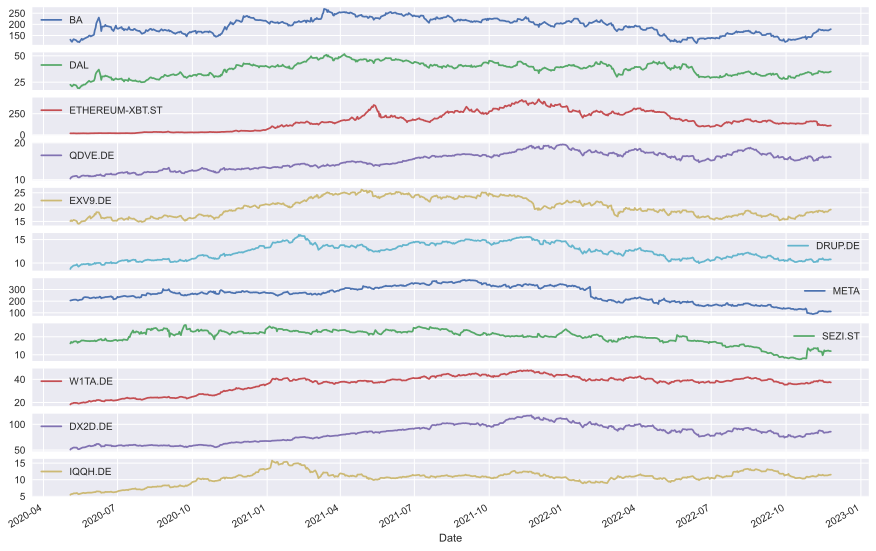

In [287]:
data.plot(subplots = True, figsize=(15,10))

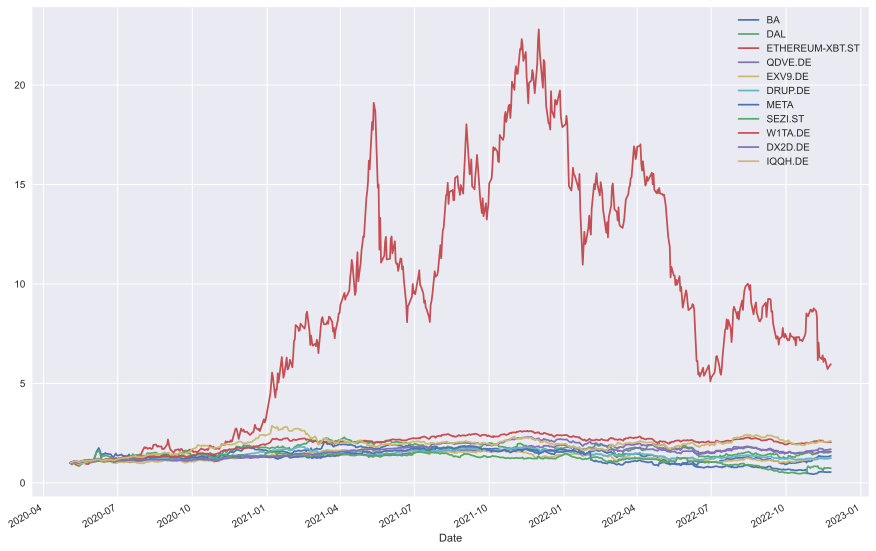

In [288]:
(data / data.iloc[0]).plot(figsize=(15,10));

# Calculate Portfolio Metrics

### Returns

In [289]:
returns = np.log(data / data.shift(1))  # daily log returns
returns.head()

,BA,DAL,ETHEREUM-XBT.ST,QDVE.DE,EXV9.DE,DRUP.DE,META,SEZI.ST,W1TA.DE,DX2D.DE,IQQH.DE
Date,,,,,,,,,,,
2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,-0.047194,-0.038849,-0.020834,0.033467,0.018594,0.040126,0.008779,0.050833,0.034895,0.039380,0.035526
2020-05-06,-0.028636,-0.033251,0.039114,0.009919,-0.020049,0.008206,0.006738,-0.026589,0.013936,0.003213,0.004397
2020-05-07,0.054223,0.031868,-0.019909,0.013319,0.012757,0.019104,0.013294,0.008942,0.000000,0.022204,0.008563
2020-05-08,0.036556,0.046855,0.021506,0.002386,0.016075,0.012008,0.005146,0.029242,0.023652,0.012288,0.026274


### Return Distributions

array([[<AxesSubplot: title={'center': 'BA'}>,
        <AxesSubplot: title={'center': 'DAL'}>,
        <AxesSubplot: title={'center': 'ETHEREUM-XBT.ST'}>],
       [<AxesSubplot: title={'center': 'QDVE.DE'}>,
        <AxesSubplot: title={'center': 'EXV9.DE'}>,
        <AxesSubplot: title={'center': 'DRUP.DE'}>],
       [<AxesSubplot: title={'center': 'META'}>,
        <AxesSubplot: title={'center': 'SEZI.ST'}>,
        <AxesSubplot: title={'center': 'W1TA.DE'}>],
       [<AxesSubplot: title={'center': 'DX2D.DE'}>,
        <AxesSubplot: title={'center': 'IQQH.DE'}>, <AxesSubplot: >]],
      dtype=object)

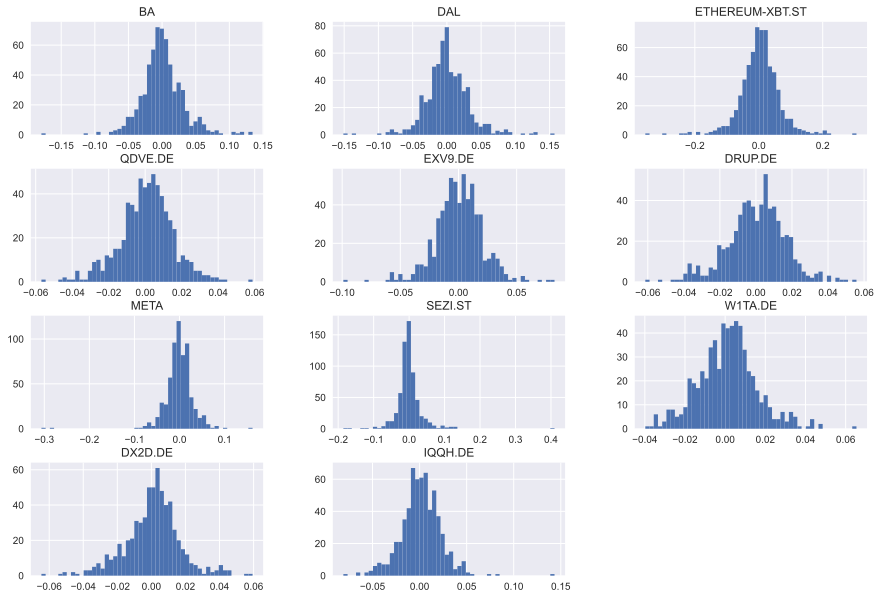

In [290]:
returns.hist(figsize=(15,10), bins = 50)

## Setting Equal Portfolio Weights

In [291]:
numberOfAssets = data.shape[1]
phi = np.ones(numberOfAssets) / numberOfAssets
phi

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

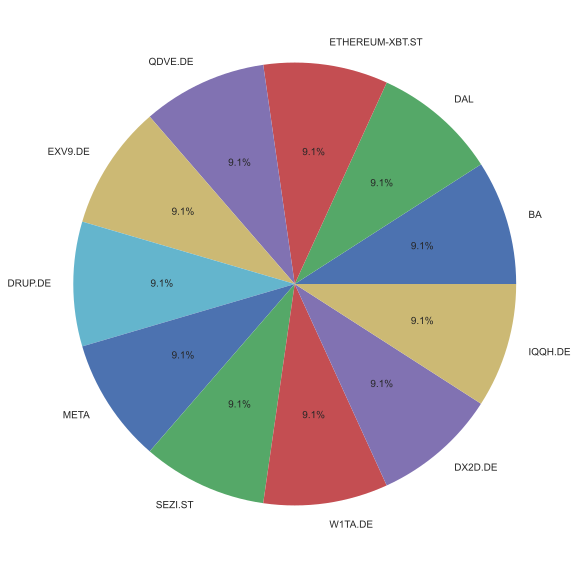

In [292]:
plt.figure(figsize=(15,10))
plt.pie(phi, labels=data.columns, autopct='%1.1f%%');

## Rolling Portfolio Sharpe Ratio Equal Weights

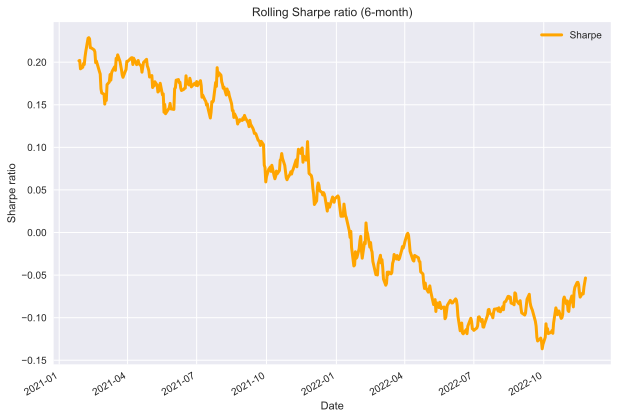

In [293]:
port_returns = (returns*phi).sum(axis = 1)
rolling_SR = port_returns.rolling(180).apply(lambda x: (x.mean()/x.std()))
rolling_SR.plot(
    style='-', 
    lw=3, 
    color='orange', 
    label='Sharpe', 
    figsize = (10,7)
)

plt.ylabel('Sharpe ratio')
plt.legend(loc='best')
plt.title('Rolling Sharpe ratio (6-month)')
plt.show()

# Maximum Sharpe Optimization

## Calculating portfolio returns

In [294]:
def get_portfolio_return(returns, weights):
    return np.dot(returns.mean() * 252, weights)

In [295]:
get_portfolio_return(returns, phi)

0.1632079411979449

## Calculating portfolio risk

In [296]:
def get_portfolio_risk(returns, weights):
    return np.sqrt(np.dot(weights, np.dot(returns.cov() * 252, weights)))

In [297]:
get_portfolio_risk(returns, phi)

0.2521281199978511

## Calculating Sharpe Ratio

In [298]:
def get_sharpe_ratio(returns, weights):
    return get_portfolio_return(returns, weights) / get_portfolio_risk(returns, weights)

In [299]:
get_sharpe_ratio(returns, phi)

0.6473214538677238

## Setting Optimization Parameters

In [300]:
boundaries = numberOfAssets * [(0, 1)]
cons = {"type": "eq", "fun": lambda phi: phi.sum() - 1}

## Optimal Portfolio

In [301]:
opt = minimize(
    lambda phi: -get_sharpe_ratio(returns, phi), phi,
    bounds = boundaries,
    constraints = cons
)
opt

     fun: -1.2798373335401347
     jac: array([ 3.98756444e-01,  2.03250468e-01,  2.51930952e-03,  2.33284086e-02,
        5.55437997e-01,  6.19049013e-01,  1.55915317e+00,  7.57383376e-01,
       -2.07066536e-04,  6.84908777e-02,  1.39166266e-02])
 message: 'Optimization terminated successfully'
    nfev: 109
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 7.59484968e-02, 0.00000000e+00,
       2.19646355e-16, 4.24010185e-17, 5.69041929e-16, 9.67897303e-17,
       9.24051503e-01, 0.00000000e+00, 0.00000000e+00])

In [302]:
phi_optimized = opt["x"]
phi_optimized

array([0.00000000e+00, 0.00000000e+00, 7.59484968e-02, 0.00000000e+00,
       2.19646355e-16, 4.24010185e-17, 5.69041929e-16, 9.67897303e-17,
       9.24051503e-01, 0.00000000e+00, 0.00000000e+00])

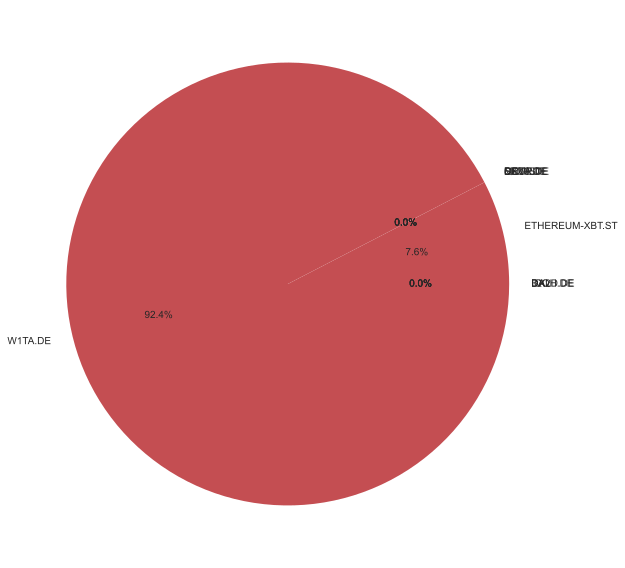

In [303]:
plt.figure(figsize=(15,10))
plt.pie(phi_optimized, labels=data.columns, autopct='%1.1f%%');

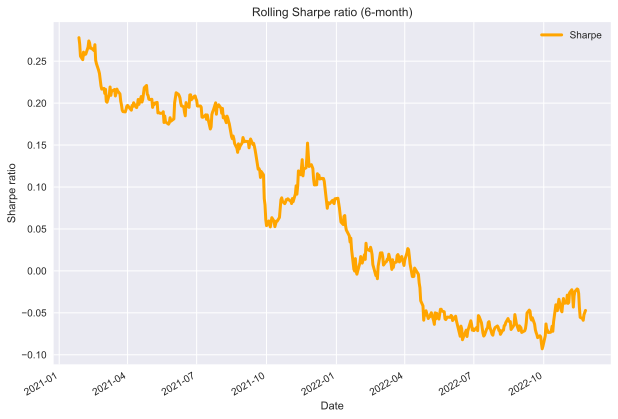

In [304]:
port_returns = (returns*phi_optimized).sum(axis = 1)
rolling_SR = port_returns.rolling(180).apply(lambda x: (x.mean()/x.std()))
rolling_SR.plot(
    style='-', 
    lw=3, 
    color='orange', 
    label='Sharpe', 
    figsize = (10,7)
)

plt.ylabel('Sharpe ratio')
plt.legend(loc='best')
plt.title('Rolling Sharpe ratio (6-month)')
plt.show()

## Results

In [305]:
print(f"Optimzed sharpe {get_sharpe_ratio(returns, phi_optimized)}")
print(f"Optimized portfolio return {get_portfolio_return(returns, phi_optimized)}")
print(f"Portfolio risk {get_portfolio_risk(returns, phi_optimized)}")

Optimzed sharpe 1.2798373335401347
Optimized portfolio return 0.31753552771495824
Portfolio risk 0.24810616114520506


# Risk Parity & Budgeting

## Calculating Metrics

In [306]:
def get_portfolio_variance(weights, returns):
    return np.dot(weights.T, np.dot(returns.cov(), weights)) * 252

In [307]:
def get_portfolio_volatility(weights, returns):
    return np.sqrt(get_portfolio_variance(weights, returns))

In [308]:
portfolioVolatility = get_portfolio_volatility(phi, returns)

In [309]:
portfolioVolatility / numberOfAssets

0.022920738181622827

In [310]:
marginalVolatilities = np.dot(returns.cov() * 252, phi) / portfolioVolatility
marginalVolatilities

array([0.31323933, 0.32278858, 0.59961635, 0.16237936, 0.22889259,
       0.19175323, 0.21779361, 0.1531419 , 0.16536363, 0.20118891,
       0.21725184])

In [311]:
riskContributionPercentage = marginalVolatilities * phi
riskContributionPercentage

array([0.0284763 , 0.02934442, 0.05451058, 0.01476176, 0.02080842,
       0.01743211, 0.01979942, 0.01392199, 0.01503306, 0.0182899 ,
       0.01975017])

In [312]:
relativeRiskContributionPercentage = riskContributionPercentage / riskContributionPercentage.sum()
relativeRiskContributionPercentage

array([0.11294378, 0.11638692, 0.21620189, 0.05854865, 0.08253113,
       0.0691399 , 0.0785292 , 0.05521792, 0.05962468, 0.07254209,
       0.07833385])

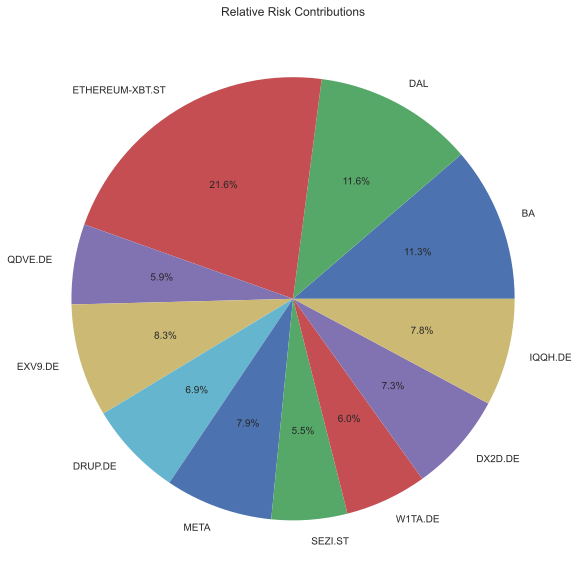

In [313]:
plt.figure(figsize=(15,10))
plt.pie(relativeRiskContributionPercentage, labels=data.columns, autopct='%1.1f%%')
plt.title('Relative Risk Contributions');

## Calculating Relative Risk Contributions

In [314]:
def get_relative_risk_contributions(weights, returns):
    volatility = get_portfolio_volatility(weights, returns)
    covariance = returns.cov()
    marginalVolatilities = np.dot(covariance, weights) / volatility
    riskContribution = marginalVolatilities * weights
    relativeRiskContribution = riskContribution / riskContribution.sum()
    return relativeRiskContribution

In [315]:
relativeRiskContributionPercentage = get_relative_risk_contributions(phi, returns)
relativeRiskContributionPercentage

array([0.11294378, 0.11638692, 0.21620189, 0.05854865, 0.08253113,
       0.0691399 , 0.0785292 , 0.05521792, 0.05962468, 0.07254209,
       0.07833385])

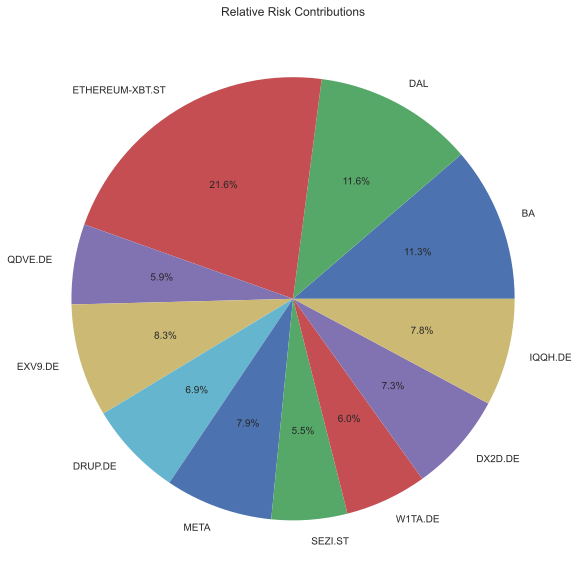

In [316]:
plt.figure(figsize=(15,10))
plt.pie(relativeRiskContributionPercentage, labels=data.columns, autopct='%1.1f%%')
plt.title('Relative Risk Contributions');

## Calculating MSE vs Actual Returns as Target

In [317]:
def get_mse_risk_contributions(weights, target, returns):
    riskContribution = get_relative_risk_contributions(weights, returns)
    mse = ((riskContribution - target) ** 2).mean()
    return mse * 100

In [318]:
get_mse_risk_contributions(phi, phi, returns)

0.19386854442237333

## Setting Optimization Parameters

In [319]:
boundaries = numberOfAssets * [(0, 1),]
cons = {"type": "eq", "fun": lambda weights: weights.sum() - 1}
target = numberOfAssets * [1 / numberOfAssets]

In [320]:
opt = minimize(
    lambda w: get_mse_risk_contributions(w, target = target, returns = returns), phi,
    bounds = boundaries,
    constraints = cons
)

## Optimal Portfolio

In [321]:
opt

     fun: 3.416702916468079e-08
     jac: array([-2.19269953e-04,  5.58007343e-04,  2.66669257e-04,  5.44142623e-05,
       -8.39148879e-05,  1.37705628e-04, -3.86894121e-04, -1.10649849e-03,
        3.22856779e-04,  4.52182115e-04,  2.96783641e-04])
 message: 'Optimization terminated successfully'
    nfev: 194
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.06853946, 0.06640934, 0.04395197, 0.11957141, 0.08851053,
       0.1024744 , 0.09188395, 0.10971386, 0.1188855 , 0.09925153,
       0.09080805])

In [322]:
phi_optimized = opt["x"]


## Results

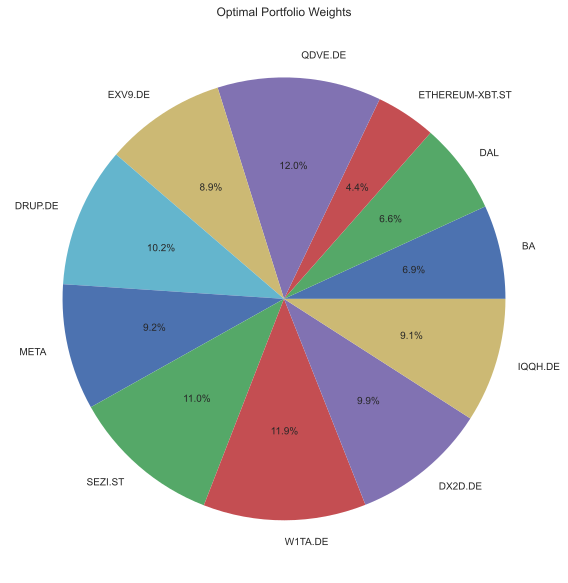

In [323]:
plt.figure(figsize=(15,10))
plt.pie(phi_optimized, labels=data.columns, autopct='%1.1f%%')
plt.title('Optimal Portfolio Weights');

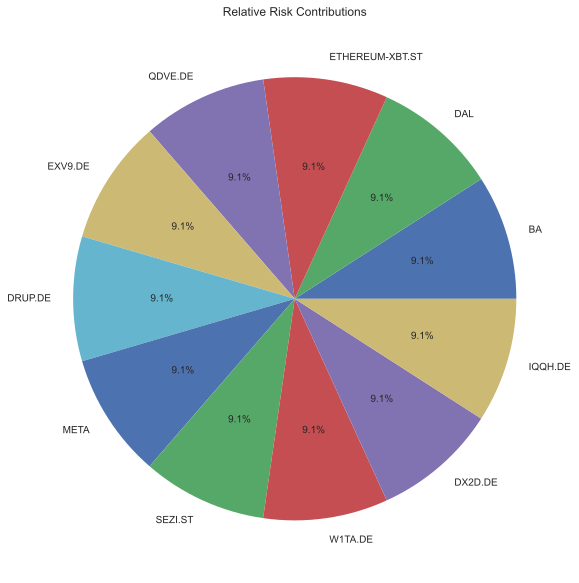

In [324]:
relativeRiskContributionPercentage_optimized = get_relative_risk_contributions(opt["x"], returns)

plt.figure(figsize=(15,10))
plt.pie(relativeRiskContributionPercentage_optimized, labels=data.columns, autopct='%1.1f%%')
plt.title('Relative Risk Contributions');

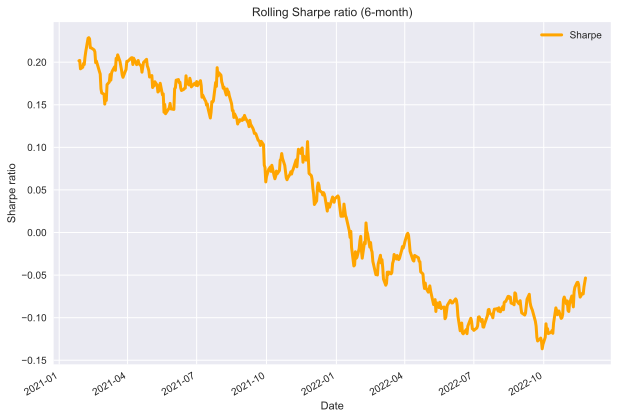

In [325]:
port_returns = (returns*phi).sum(axis = 1)
rolling_SR = port_returns.rolling(180).apply(lambda x: (x.mean()/x.std()))
rolling_SR.plot(
    style='-', 
    lw=3, 
    color='orange', 
    label='Sharpe', 
    figsize = (10,7)
)

plt.ylabel('Sharpe ratio')
plt.legend(loc='best')
plt.title('Rolling Sharpe ratio (6-month)')
plt.show()

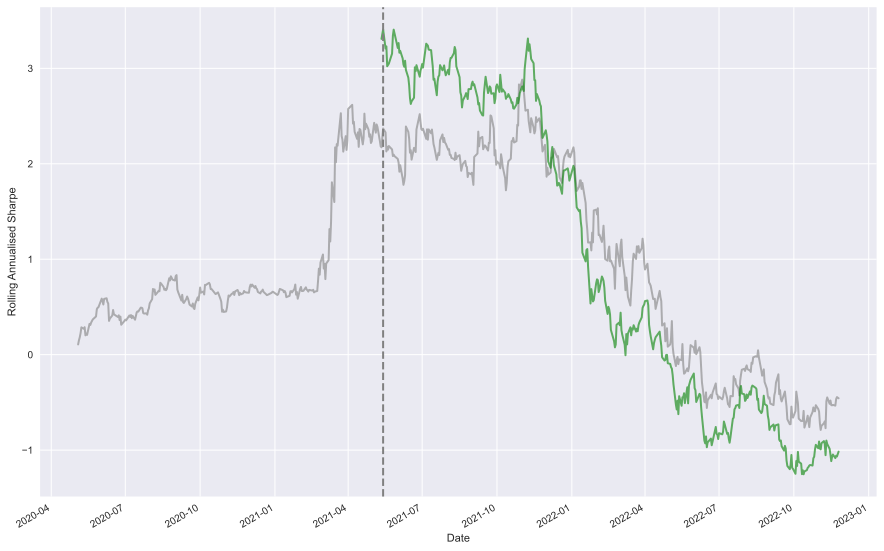

In [326]:
def get_results(data, benchmark = None, periods = 252):
    # Equity
    equity_s = data.sort_index()

    # Returns
    returns_s = equity_s.pct_change().fillna(0.0).sum(axis = 1)

    # Rolling Annualised Sharpe
    rolling = returns_s.rolling(window = periods)
    rolling_sharpe_s = np.sqrt(periods) * (
        rolling.mean() / rolling.std()
    )

    statistics = pd.DataFrame(data = rolling_sharpe_s, index = rolling_sharpe_s.index, columns = ["rolling_sharpe"])

    # Benchmark statistics if benchmark ticker specified
    if benchmark is not None:
        equity_b = benchmark.sort_index()
        returns_b = equity_b.pct_change().fillna(0.0)
        rolling_b = returns_b.rolling(window = periods)
        rolling_sharpe_b = np.sqrt(periods) * (
            rolling_b.mean() / rolling_b.std()
        )
        statistics["rolling_sharpe_b"] = rolling_sharpe_b

    return statistics

def _plot_rolling_sharpe(stats, benchmark = True, ax=None, periods = 252, **kwargs):

    if ax is None:
        ax = plt.gca()

    sharpe = stats['rolling_sharpe']
    if benchmark is not False:
        benchmark = stats['rolling_sharpe_b']
        benchmark.plot(
            lw = 2, 
            color = 'gray', 
            label = "SPY", 
            alpha = 0.60, 
            ax = ax, 
            **kwargs
        )

    sharpe.plot(
        lw = 2, 
        color = 'green', 
        alpha = 0.6, 
        x_compat = False,
        label = 'Backtest', 
        figsize = (15, 10), 
        ax = ax, 
        **kwargs
    )

    ax.axvline(sharpe.index[periods], linestyle = "dashed", c="gray", lw=2)
    ax.set_ylabel('Rolling Annualised Sharpe')

statistics = get_results(data, benchmark)
_plot_rolling_sharpe(statistics)

In [327]:
statistics

,rolling_sharpe,rolling_sharpe_b
Date,,
2020-05-04,NaN,0.107286
2020-05-05,NaN,0.149682
2020-05-06,NaN,0.181422
2020-05-07,NaN,0.224072
2020-05-08,NaN,0.285925
...,...,...
2022-11-18,-1.046733,-0.526678
2022-11-21,-1.084031,-0.534319
2022-11-22,-1.059230,-0.465942
